# <center>Data Science Project: Election Preference by County</center>

## **1. Introduction**
---

### Participants:  Jialin Li(Cullen), Alexa Huang
---

### Data Science Project Steps:
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3.Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.
4. Divide data into test an training set.Evaluate variety of algorithms by creating test harness for diverse algorithms in conjuction with resampling techniques like cross validation bootstrapping.
5. Improve Result by playing with hyperparameters and innovative methods like ensembles.
6. Choose the best model and present the results.

### **1.1 Define the Research problem and questions**


#### Research Hypothesis:
* The project studies the grayscale images that could recognize the physical item label, using the frequency of the pixel scalar in an image to classify out the physical item label.

#### Research Questions:
1. Does the convert image pixels affect the label chosen?
2. Is there any correlation between the frequncy of grayscale pixels in a image and labels?
3. Is there any correlation between each image pixels?
4. Is better to use 

## **2. Analyze data by descriptive statistics and graphical visualization**
---

### 2.1 Download Data

https://www.kaggle.com/c/digit-recognizer/data

### 2.2 Preparing Data

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen
import json
from random import randrange
import seaborn as sns

In [3]:
trainining_data = pd.read_csv('digital/train.csv')
testing_data = pd.read_csv('digital/test.csv')
trainining_data.shape , testing_data.shape

((42000, 785), (28000, 784))

### 2.3 Descriptive Statistics and Graphical Visualization
---

#### 2.3.1 Table Information:

In [4]:
print("Dataset Analysis:")
print(trainining_data.shape)
print(trainining_data.info())
print(trainining_data.describe())
print(trainining_data.dtypes)

Dataset Analysis:
(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  4200

image information:
Label of the image:[9]
Shape of the image : (1, 785)


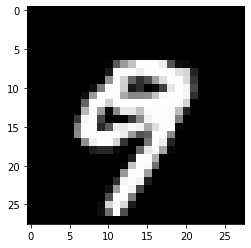

In [6]:
sample_image =trainining_data.sample(1)
print("image information:")
print('Label of the image:{}'.format(sample_image.label.values))
print('Shape of the image : {}'.format(sample_image.shape))
sample_pixels = pd.DataFrame(sample_image.drop(columns= "label").values.reshape(28,28))
plt.imshow(sample_pixels,cmap='gray')
plt.show()

#### 2.3.2 Evaluating Data

##### 2.3.2.1 Frequency Ditriution
--- 

Digit Frequency:
   label  counts
0      1    4684
1      7    4401
2      3    4351
3      9    4188
4      2    4177
5      6    4137
6      0    4132
7      4    4072
8      8    4063
9      5    3795


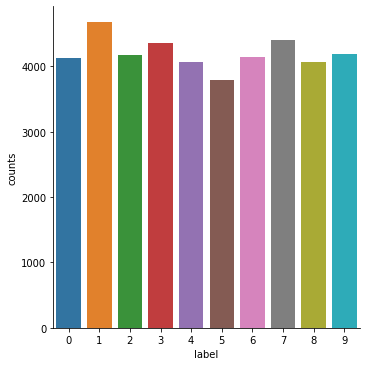

In [7]:
# a) For the categorical variable create a frequency distribution.
# b) For the categorical variable create a bar diagram.
print('Digit Frequency:')
frequency = pd.DataFrame(trainining_data['label'].value_counts()).reset_index()
frequency = frequency.rename(columns={'label':'counts','index':'label'})
print(frequency)
sns.catplot(x='label',y='counts',kind="bar", data=frequency, height=5)

##### 2.3.2.2 Distribution plot
---

A Sample image's pixel distribution:


(array([616.,  15.,   8.,  10.,   6.,  12.,  11.,   6.,  12.,  89.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

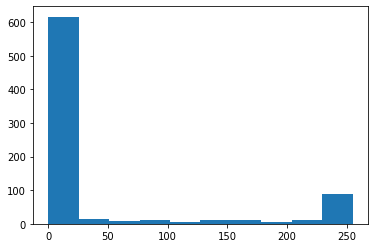

In [8]:
# A Sample image's pixel distribution
print("A Sample image's pixel distribution:")
plt.hist(sample_image.values[0])

## **3. Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.**
---

### 3.1 Standardize Data

In [10]:
#stratified sampling
analysis_data = trainining_data.copy()
analysis_data['total_pixels']= trainining_data.iloc[:,1:].apply(lambda x: x.values.sum(),axis=1)
analysis_data['average_grayscale'] = analysis_data['total_pixels'].apply(lambda x: x / 784)
analysis_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,total_pixels,average_grayscale
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16649,21.235969
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,44609,56.899235
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13425,17.123724
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15025,19.164541
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51093,65.169643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29310,37.385204
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13415,17.110969
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31504,40.183673
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26381,33.649235


### 3.2 Null Values Checking
---

In [11]:
empty_data = trainining_data[trainining_data.isna().any(axis=1)]
print(empty_data)
trainining_data = trainining_data.drop(empty_data.index)
trainining_data

Empty DataFrame
Columns: [label, pixel0, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, ...]
Index: []

[0 rows x 785 columns]


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3 Outliers Checking

<AxesSubplot:xlabel='label', ylabel='average_grayscale'>

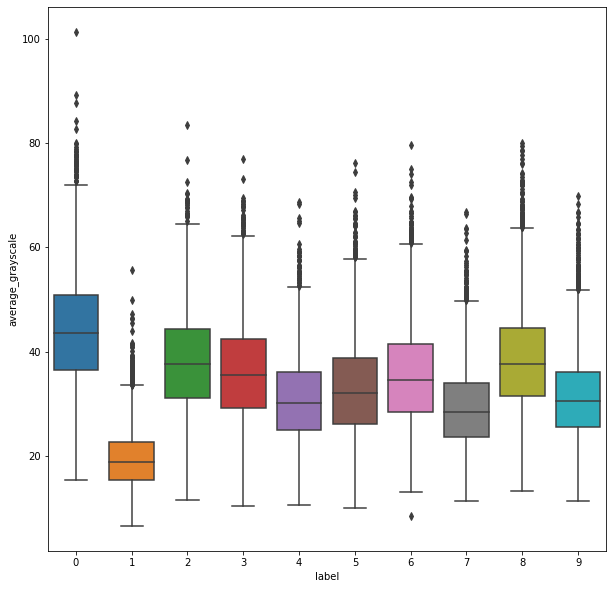

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x='label',y='average_grayscale',data=analysis_data)

### 3.4 Correlation and Regression Analysis

Mean squared error: 1871567600042818560.00
Coefficient of determination: -225298032235270240.00


ValueError: x and y must be the same size

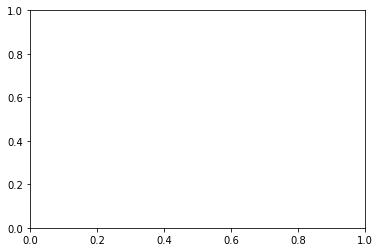

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
# Dividing data into two subsets training and test set.Training set trains the model
X_train, X_test, y_train, y_test = train_test_split(trainining_data.iloc[:,1:], trainining_data['label'], test_size=0.30)

regr.fit(X_train,y_train)
Y_pred = regr.predict(X_test)
# print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

##### Correlation Matrix

In [ ]:
print('Correlation of graysacle pixels')
sns.heatmap(
    trainining_data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
# a) Objective and rationale of using the specific algorithm to achieve the objective.
# a) Steps of implementing the algorithm with regards to the context. Create relevant graphs.
# b) Interpretation of the results and prediction accuracy achieved
# c) Performance improvement techniques and improved accuracy achieved. Use feature selection, variable importance, compare RMSE(Regression) across models and Information gain (Decision Trees). K-fold cross validation , grid search etc.

## **4. Divide data into test an training set.Evaluate variety of algorithms by creating test harness for diverse algorithms in conjuction with resampling techniques like cross validation bootstrapping.**
---

### 4.1 Preparing Data

In [12]:
# Dividing data into two subsets training and test set.Training set trains the model
from sklearn.model_selection import train_test_split


#generate trainning set and testing set
X = trainining_data.drop(columns=['label'])
y = trainining_data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



### 4.2 Clustering tendency

In [13]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# hopkins implementation
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

print('Clustering tendency(hopkins score): %s'% hopkins(X))


KeyboardInterrupt: 

### 4.3 KNN Implementation

#### 4.3.1 Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train,y_train)
y_pred = KNNmodel.predict(X_test)

#### 4.3.2 Evaluating

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred))
print("accuracy score %s%%" % (accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test, y_pred))


#### 4.3.2 Sample Perdiction

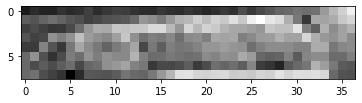

array(['eye'], dtype=object)

In [116]:
pre_sample = trainining_data.sample(1)
perdiction = KNNmodel.predict(scaler.transform(pre_sample.drop(columns=['label'])))
plt.imshow(pre_sample.iloc[:,1:].values.reshape(28,28),cmap='gray')
plt.show()
perdiction

### 4.2 Comparing Algorithms 
---

In [ ]:
# Comparing Algorithms 
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723 
print('Images Dataset:\n')
results = []
names = []
for name, model in models:
  models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=models_kfold)
  cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test), cv=models_kfold)
  results.append(cv_results)
  names.append(name)
  msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
  print(msg)
  msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
  print(msg_testing)
print('10-Fold cross-validation accuracy score applied for the training data for 5 classifiers')

## **5. Improve Result by playing with hyperparameters and innovative methods like ensembles.**
---


#### 3.4.2 Feature Importance

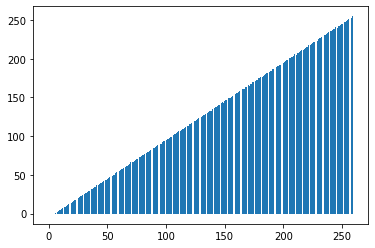

In [73]:
from sklearn.feature_selection import VarianceThreshold
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = pd.DataFrame(sel.fit_transform(prepared_data.drop(columns=['names','image_id','image_pixels','total_pixels'])))
y = prepared_data['total_pixels']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **6. Choose the best model and present the results.**
---

## **Conclusion**